In [167]:
import glob
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## get data from mpi2d csv

In [168]:
mpi2d = pd.read_csv('mpi2d.csv')
mpi2d

,x,y,freq,steps,seed,node,rank per node,dimension,time,name,total_rank
0,1000,1000,1,128,10,1,4,2,14.647400,1000(2000)_1000_n1_different_rank.out,4
1,1000,1000,1,128,10,1,9,2,6.762820,1000(2000)_1000_n1_different_rank.out,9
2,1000,1000,1,128,10,1,16,2,4.015560,1000(2000)_1000_n1_different_rank.out,16
3,1000,1000,1,128,10,1,25,2,2.639720,1000(2000)_1000_n1_different_rank.out,25
4,1000,1000,1,128,10,1,36,2,2.003030,1000(2000)_1000_n1_different_rank.out,36
...,...,...,...,...,...,...,...,...,...,...,...
161,1000,1000,4,128,10,2,50,2,0.955842,1000_1000_n2_different_frequency.out,100
162,1000,1000,8,128,10,2,50,2,0.780318,1000_1000_n2_different_frequency.out,100
163,1000,1000,16,128,10,2,50,2,0.866403,1000_1000_n2_different_frequency.out,100
164,1000,1000,32,128,10,2,50,2,1.250760,1000_1000_n2_different_frequency.out,100


# Fixed board size, time change with rank, different update frequency(几条线）

In [169]:
#get data
new_data = mpi2d.copy()
new_data = new_data[new_data['name'].str.contains('frequency')]

### Node == 1

In [170]:
n1_data = new_data[new_data['node'] == 1]
n1_1000 = n1_data[n1_data['x'] == 1000]
n1_2000 = n1_data[n1_data['x'] == 2000]

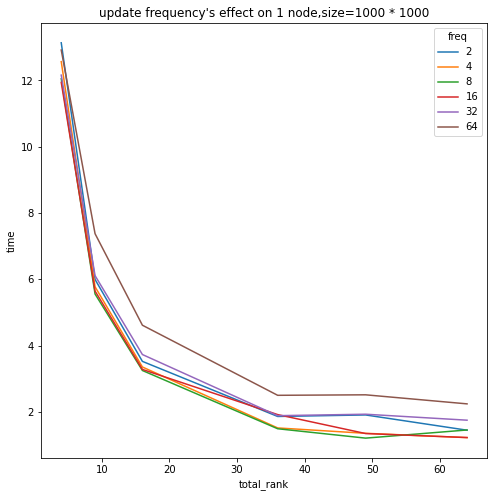

In [171]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("tab10", 6)
sns.lineplot(data=n1_1000, x='total_rank',y='time',hue='freq',palette=palette)
plt.title("update frequency's effect on 1 node,size=1000 * 1000")
plt.savefig('fig/mpi2d_frequency_1000_n1')

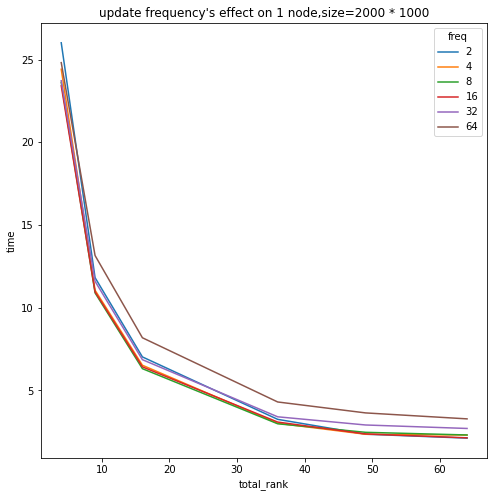

In [172]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("tab10", 6)
sns.lineplot(data=n1_2000, x='total_rank',y='time',hue='freq',palette=palette)
plt.title("update frequency's effect on 1 node,size=2000 * 1000")
plt.savefig('fig/mpi2d_frequency_2000_n1')

### Node == 2

In [173]:
n2_data = new_data[new_data['node'] == 2]
n2_1000 = n2_data[n2_data['x'] == 1000]
n2_2000 = n2_data[n2_data['x'] == 2000]

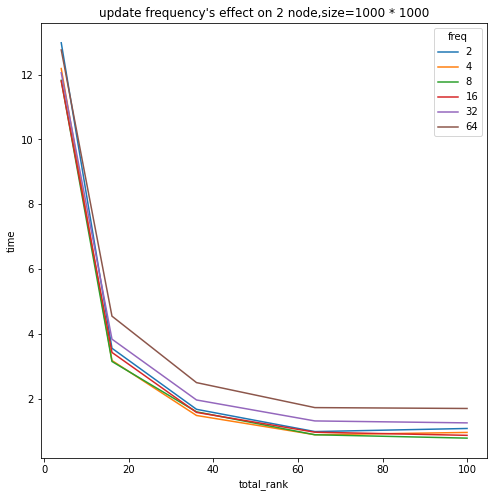

In [174]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("tab10", 6)
sns.lineplot(data=n2_1000, x='total_rank',y='time',hue='freq',palette=palette)
plt.title("update frequency's effect on 2 node,size=1000 * 1000")
plt.savefig('fig/mpi2d_frequency_1000_n2')

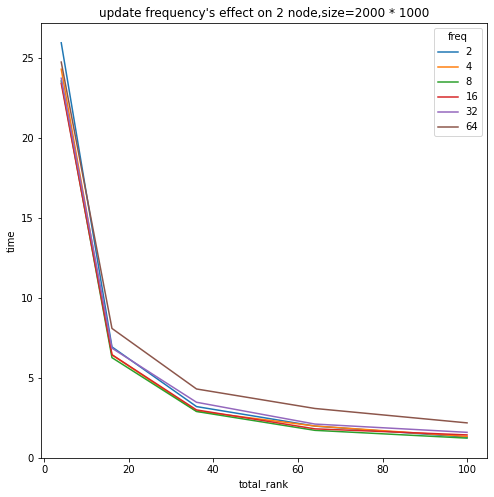

In [175]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("tab10", 6)
sns.lineplot(data=n2_2000, x='total_rank',y='time',hue='freq',palette=palette)
plt.title("update frequency's effect on 2 node,size=2000 * 1000")
plt.savefig('fig/mpi2d_frequency_2000_n2')

# Weak Scaling

In [176]:
new_data = mpi2d.copy()
new_data = new_data[new_data['name'].str.contains('weak')]

In [177]:
new_data['weak'] = 44.0368 / new_data['time']
new_data

,x,y,freq,steps,seed,node,rank per node,dimension,time,name,total_rank,weak
126,4000,1000,1,128,10,1,4,1,58.5572,weak_scaling.out,4,0.752030
127,9000,1000,1,128,10,1,9,1,59.9696,weak_scaling.out,9,0.734319
128,16000,1000,1,128,10,1,16,1,60.9501,weak_scaling.out,16,0.722506
129,25000,1000,1,128,10,1,25,1,62.1378,weak_scaling.out,25,0.708696
130,36000,1000,1,128,10,1,36,1,63.3950,weak_scaling.out,36,0.694642
131,64000,1000,1,128,10,1,64,1,68.0745,weak_scaling.out,64,0.646891
132,4000,1000,1,128,10,2,2,1,58.6038,weak_scaling.out,4,0.751433
133,16000,1000,1,128,10,2,8,1,60.9263,weak_scaling.out,16,0.722788
134,36000,1000,1,128,10,2,18,1,63.7717,weak_scaling.out,36,0.690538
135,64000,1000,1,128,10,2,32,1,65.6599,weak_scaling.out,64,0.670680


In [178]:
weak_n1 = new_data[new_data['node'] == 1]
weak_n2 = new_data[new_data['node'] == 2]

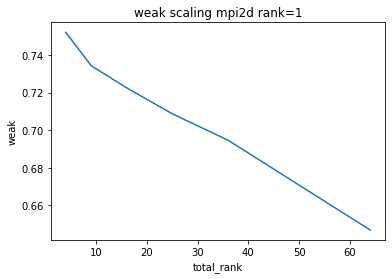

In [179]:
sns.lineplot(data=weak_n1,x='total_rank',y='weak')
plt.title("weak scaling mpi2d rank=1")
plt.savefig('fig/mpi2d_weak_n1')

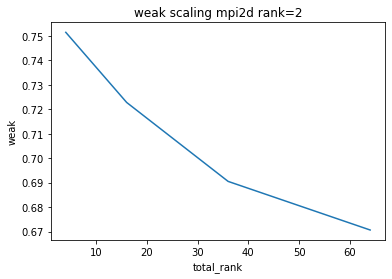

In [180]:
sns.lineplot(data=weak_n2,x='total_rank',y='weak')
plt.title("weak scaling mpi2d rank=2")
plt.savefig('fig/mpi2d_weak_n2')

# Fixed board size, update frequency, time change with rank (same node) 几条线，2个size

In [181]:
df_n1 = mpi2d[mpi2d['name'] == '1000(2000)_1000_n1_different_rank.out']
df_n2 = mpi2d[mpi2d['name'] == '1000(2000)_1000_n2_different_rank.out']

### Node == 1

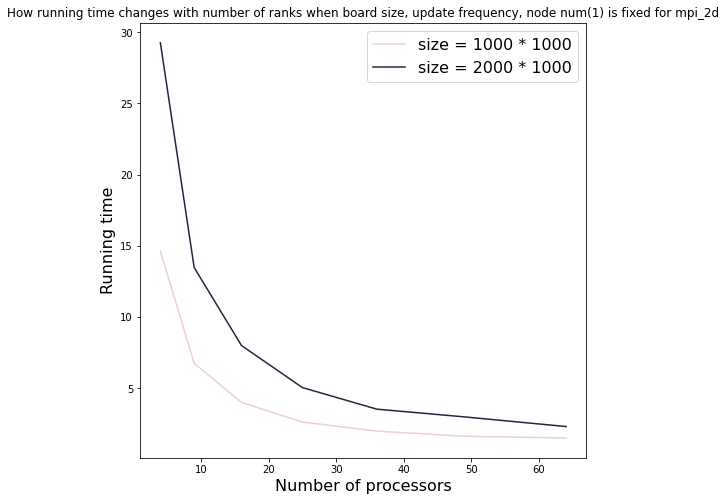

In [182]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df_n1, x='total_rank',y='time',hue='x')
plt.legend(labels=['size = 1000 * 1000', 'size = 2000 * 1000'], fontsize=16)
plt.title("How running time changes with number of ranks when board size, update frequency, node num(1) is fixed for mpi_2d")
plt.ylabel("Running time", fontsize=16)
plt.xlabel("Number of processors", fontsize=16)
plt.savefig('fig/mpi2d_rank_n1')

### Node == 2

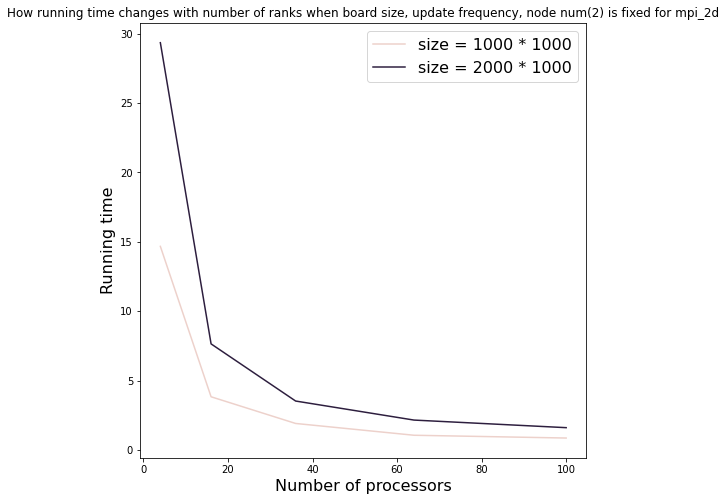

In [183]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df_n2, x='total_rank',y='time',hue='x')
plt.legend(labels=['size = 1000 * 1000', 'size = 2000 * 1000'], fontsize=16)
plt.title("How running time changes with number of ranks when board size, update frequency, node num(2) is fixed for mpi_2d")
plt.ylabel("Running time", fontsize=16)
plt.xlabel("Number of processors", fontsize=16)
plt.savefig('fig/mpi2d_rank_n2')

# Strong scaling(multiple size)

In [184]:
df_n1_s1 = df_n1[df_n1['x'] == 1000]
df_n1_s2 = df_n1[df_n1['x'] == 2000]
df_n2_s1 = df_n2[df_n2['x'] == 1000]
df_n2_s2 = df_n2[df_n2['x'] == 2000]
df_n1_s1['speed_up_strong'] = 44.086/df_n1_s1['time']
df_n1_s2['speed_up_strong'] = 88.1854/df_n1_s2['time']
df_n2_s1['speed_up_strong'] = 44.086/df_n2_s1['time']
df_n2_s2['speed_up_strong'] = 88.1854/df_n2_s2['time']
df_n1_s1['efficiency_strong'] = df_n1_s1['speed_up_strong']/df_n1_s1['total_rank']
df_n1_s2['efficiency_strong'] = df_n1_s2['speed_up_strong']/df_n1_s2['total_rank']
df_n2_s1['efficiency_strong'] = df_n2_s1['speed_up_strong']/df_n2_s1['total_rank']
df_n2_s2['efficiency_strong'] = df_n2_s2['speed_up_strong']/df_n2_s2['total_rank']

/var/folders/f5/8xj21yh179v3dxw13qwf70780000gn/T/ipykernel_31274/417927633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1_s1['speed_up_strong'] = 44.086/df_n1_s1['time']
/var/folders/f5/8xj21yh179v3dxw13qwf70780000gn/T/ipykernel_31274/417927633.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1_s2['speed_up_strong'] = 88.1854/df_n1_s2['time']
/var/folders/f5/8xj21yh179v3dxw13qwf70780000gn/T/ipykernel_31274/417927633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

### Node == 1

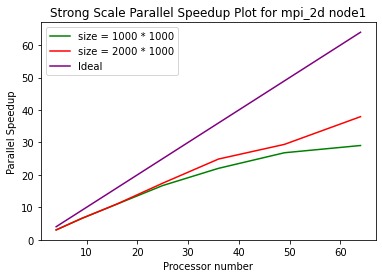

In [185]:
plt.title("Strong Scale Parallel Speedup Plot for mpi_2d node1")
plt.xlabel("Processor number")
plt.ylabel("Parallel Speedup")
plt.plot(df_n1_s1['total_rank'], df_n1_s1['speed_up_strong'], color ="green", label = "size = 1000 * 1000")
plt.plot(df_n1_s2['total_rank'], df_n1_s2['speed_up_strong'], color ="red", label = "size = 2000 * 1000")
plt.plot(df_n1_s1['total_rank'], df_n1_s1['total_rank'], color ="purple", label = "Ideal")
plt.legend(loc="upper left")
plt.savefig('fig/mpi2d_strong_speed_n1')

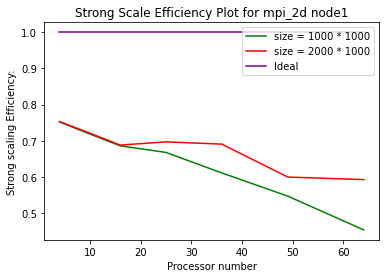

In [186]:
plt.title("Strong Scale Efficiency Plot for mpi_2d node1")
plt.xlabel("Processor number")
plt.ylabel("Strong scaling Efficiency:")
plt.plot(df_n1_s1['total_rank'], df_n1_s1['efficiency_strong'], color ="green", label = "size = 1000 * 1000")
plt.plot(df_n1_s2['total_rank'], df_n1_s2['efficiency_strong'], color ="red", label = "size = 2000 * 1000")
plt.plot(df_n1_s1['total_rank'], df_n1_s1['total_rank']/df_n1_s1['total_rank'], color ="purple", label = "Ideal")
plt.legend(loc="upper right")
plt.savefig('fig/mpi2d_strong_efficiency_n1')

### Node == 2

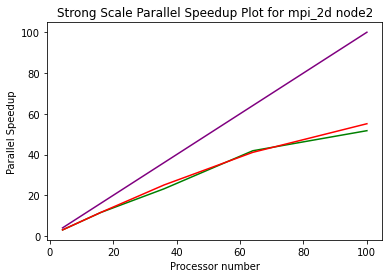

In [187]:
plt.title("Strong Scale Parallel Speedup Plot for mpi_2d node2")
plt.xlabel("Processor number")
plt.ylabel("Parallel Speedup")
plt.plot(df_n2_s1['total_rank'], df_n2_s1['speed_up_strong'], color ="green", label = "size = 1000 * 1000")
plt.plot(df_n2_s2['total_rank'], df_n2_s2['speed_up_strong'], color ="red", label = "size = 2000 * 1000")
plt.plot(df_n2_s1['total_rank'], df_n2_s1['total_rank'], color ="purple", label = "Ideal")
plt.savefig('fig/mpi2d_strong_speed_n2')

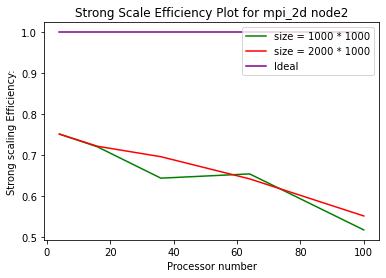

In [188]:
plt.title("Strong Scale Efficiency Plot for mpi_2d node2")
plt.xlabel("Processor number")
plt.ylabel("Strong scaling Efficiency:")
plt.plot(df_n2_s1['total_rank'], df_n2_s1['efficiency_strong'], color ="green", label = "size = 1000 * 1000")
plt.plot(df_n2_s2['total_rank'], df_n2_s2['efficiency_strong'], color ="red", label = "size = 2000 * 1000")
plt.plot(df_n2_s1['total_rank'], df_n2_s1['total_rank']/df_n2_s1['total_rank'], color ="purple", label = "Ideal")
plt.legend(loc="upper right")
plt.savefig('fig/mpi2d_strong_efficiency_n2')